In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("training_set.tsv", sep='\t', encoding="ISO-8859-1")
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12978.000000,12978.000000,12977.000000,12977.000000,128.000000,12978.000000,0.0,0.0,0.0,0.0,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.432809,4.179458,4.126840,4.137089,37.828125,1.579982,NaN,NaN,NaN,NaN,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6308.588616,2.136749,4.212537,4.264320,5.240829,3.963514,NaN,NaN,NaN,NaN,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4439.250000,2.000000,2.000000,2.000000,36.000000,0.000000,NaN,NaN,NaN,NaN,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10045.500000,4.000000,3.000000,3.000000,40.000000,0.000000,NaN,NaN,NaN,NaN,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15680.750000,6.000000,4.000000,4.000000,40.000000,0.000000,NaN,NaN,NaN,NaN,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,12.000000,NaN,NaN,NaN,NaN,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12978 non-null  int64  
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   0 non-null      float64
 11  rater1_trait2   0 non-null      float64
 12  rater1_trait3   0 non-null      float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [5]:
df.shape

(12978, 28)

In [6]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         0
rater1_domain2    12978
rater2_domain2    12978
domain2_score     12978
rater1_trait1     12978
rater1_trait2     12978
rater1_trait3     12978
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [7]:
df.dropna(axis=1, inplace=True)

In [8]:
df.shape

(12978, 4)

In [9]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",11
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",12
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",11
4,5,1,"Dear @LOCATION1, I know having computers has a...",12


In [10]:
df['essay_set'].value_counts()

5    1805
2    1800
6    1800
1    1783
4    1772
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1', 'rater2_domain1'], inplace=True, axis=1)

KeyError: "['rater1_domain1', 'rater2_domain1'] not found in axis"

In [12]:
df.shape

(12978, 4)

In [13]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",11
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",12
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",11
4,5,1,"Dear @LOCATION1, I know having computers has a...",12


In [14]:
min(df['domain1_score'])

0

In [15]:
max(df['domain1_score'])

12

In [16]:
df.skew()

essay_id         0.044354
essay_set        0.067940
domain1_score    2.116416
dtype: float64

In [17]:
df.kurtosis()

essay_id        -1.174096
essay_set       -1.151146
domain1_score    2.497905
dtype: float64

/var/folders/gf/w603fwyn6l3fpy_8v1q3j2b40000gn/T/ipykernel_29014/1034205877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

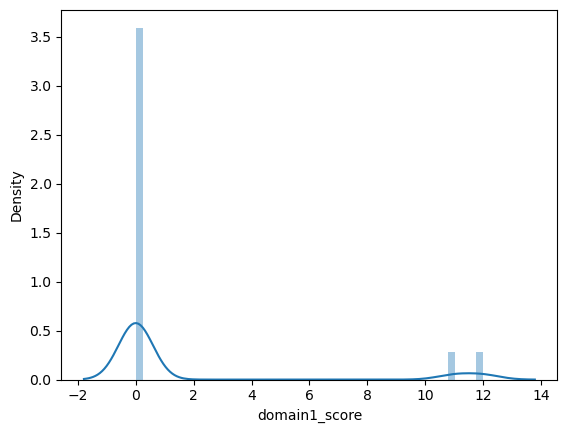

In [18]:
sns.distplot(df['domain1_score'])

In [19]:
df[df['essay_set']==2]['domain1_score']

1783    0
1784    0
1785    0
1786    0
1787    0
       ..
3578    0
3579    0
3580    0
3581    0
3582    0
Name: domain1_score, Length: 1800, dtype: int64

In [20]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return round(x*10)

df['final_score']=df.apply(lambda x: normalize(x['domain1_score'], min_range[x['essay_set']-1], max_range[x['essay_set']-1]), axis=1)

In [21]:
df['final_score']

0        10
1         9
2        10
3         9
4        10
         ..
12973     0
12974     0
12975     0
12976     0
12977     0
Name: final_score, Length: 12978, dtype: int64

/var/folders/gf/w603fwyn6l3fpy_8v1q3j2b40000gn/T/ipykernel_29014/3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

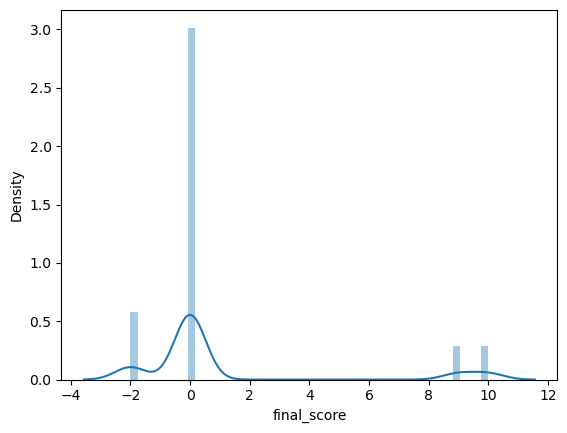

In [22]:
sns.distplot(df['final_score'])

In [23]:
df.skew()

essay_id         0.044354
essay_set        0.067940
domain1_score    2.116416
final_score      1.936015
dtype: float64

In [24]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",12,10
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",11,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",12,10
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",11,9
4,5,1,"Dear @LOCATION1, I know having computers has a...",12,10


In [25]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,12978.000000,12978.000000,12978.000000,12978.000000
mean,10295.432809,4.179458,1.579982,1.027816
std,6308.588616,2.136749,3.963514,3.454489
min,1.000000,1.000000,0.000000,-2.000000
25%,4439.250000,2.000000,0.000000,0.000000
50%,10045.500000,4.000000,0.000000,0.000000
75%,15680.750000,6.000000,0.000000,0.000000
max,21633.000000,8.000000,12.000000,10.000000


In [26]:
df.drop('domain1_score', axis=1, inplace=True)

In [27]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",10
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",10
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",9
4,5,1,"Dear @LOCATION1, I know having computers has a...",10


**Pre-Processing**

In [28]:
def clean_essay(essay):
    x = []
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x: clean_essay(x))

In [29]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x: remove_stop_words(x))

In [30]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]", "", essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x: remove_puncs(x))

In [31]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",10,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,9,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",10,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",9,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,10,Dear I know computers positive effect people ...


In [40]:
def sent2word(x):
    x = re.sub("[^A-Za-z0-9]", " ", x)
    words = nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words = []
    for i in raw:
        if len(i) > 0:
            final_words.append(sent2word(i))
    return final_words

def noOfWords(essay):
    count = 0
    for i in essay2word(essay):
        count = count + len(i)
    return count

def noOfChar(essay):
    count = 0
    for i in essay2word(essay):
        for j in i:
            count = count + len(j)
    return count

def avg_word_len(essay):
    if noOfWords(essay) != 0:
        return noOfChar(essay) / noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count = 0
    adj_count = 0
    verb_count = 0
    adverb_count = 0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if pos_tag[0] == 'N':
                noun_count += 1
            elif pos_tag[0] == 'V':
                verb_count += 1
            elif pos_tag[0] == 'J':
                adj_count += 1
            elif pos_tag[0] == 'R':
                adverb_count += 1
    return noun_count, verb_count, adj_count, adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay = essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]", " ", essay)
    new_essay = re.sub("[0-9]", "", new_essay)
    count = 0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count += 1
    return count

In [41]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",10,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,9,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",10,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",9,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,10,Dear I know computers positive effect people ...


**Prep for ML**

In [42]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/srinivasib/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [44]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0', inplace=True, axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,1,"Dear local newspaper, I think effects computer...",10,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,2,1,Dear I believe that using computers will benef...,9,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,3,1,"Dear, More and more people use computers, but ...",10,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,4,1,"Dear Local Newspaper, I have found that many e...",9,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,5,1,Dear I know having computers has a positive ef...,10,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36


In [45]:
prep_df.shape

(12978, 14)

In [46]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis=1)
y_full = prep_df['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)

ValueError: np.nan is an invalid document, expected byte or unicode string.